In [12]:
import numpy as np
import pandas as pd
import sys
import os

BASE = os.path.realpath('../')
sys.path.insert(0, os.path.join(BASE, 'src'))

import dual_crispr_screen
import imp
imp.reload(dual_crispr_screen)

import matplotlib.pyplot as plt 

%matplotlib inline

In [2]:
%load_ext autoreload

%autoreload 2

In [6]:
# Global parameters

BASE = os.path.realpath('../')
TEST_SET = os.path.join(BASE, 'data', 'test_data','input_data', 'TestSet8')
A549 = os.path.join(BASE, 'data', 'test_data', 'input_data', 'A549')

# A549 

In [8]:
#abundance_file = "/cellar/users/bpmunson/crappy/data/test_data/input_data/A549/A549_abundance_thresholds.txt"
#counts_file = "/cellar/users/bpmunson/crappy/data/test_data/input_data/A549/A549_timepoint_counts.txt"

abundance_file = os.path.join(A549, 'A549_abundance_thresholds.txt')
counts_file = os.path.join(A549, 'A549_timepoint_counts.txt')

times = np.array([3,14,21,28])

# initialize screen object
screen = dual_crispr_screen.Screen(counts_file, times, abundance_file)

# set some parameters
# number of iterations to perform
screen.options.niter = 2
screen.options.null_target_id = '0'
screen.options.verbose = True

# perform construct fitness calculation
screen.run_construct_fitting()

# run bootstraps
screen.run_bootstrap()

# summarize results 
screen.summarize()

# view results 
screen.results.head()

/cellar/users/samsonfong/crappy/src/fit_ac_fc.py:258: RuntimeWarning: invalid value encountered in true_divide
  fc = np.divide(f.sum(axis=0), var_time.sum(axis=0))
/cellar/users/samsonfong/crappy/src/fit_ac_fc.py:284: RuntimeWarning: invalid value encountered in true_divide
  sdfc = np.divide(num, denom).data


Iter	RMS	Relative Error
1	0.0234	0.029609
2	0.0231	0.017972
3	0.0229	0.013193
4	0.0229	0.011195
5	0.0229	0.009443
6	0.0229	0.007252
7	0.0229	0.005264
8	0.0229	0.004032
9	0.0228	0.003460
10	0.0228	0.003224
11	0.0227	0.003122
12	0.0227	0.003071
13	0.0226	0.003037
14	0.0226	0.003005
15	0.0225	0.002964
16	0.0225	0.002900
17	0.0225	0.002795
18	0.0224	0.002640
19	0.0224	0.002437
20	0.0224	0.002191
21	0.0224	0.001913
22	0.0223	0.001629
23	0.0223	0.001359
24	0.0223	0.001117
25	0.0223	0.000907
Performing iteration: 1
Iter	RMS	Relative Error
1	0.0171	0.068887
2	0.0151	0.038176
3	0.0140	0.022317
4	0.0133	0.013524
5	0.0130	0.008445
6	0.0128	0.005371
7	0.0127	0.003423
8	0.0126	0.002176
9	0.0126	0.001382
10	0.0126	0.000877
Performing iteration: 2
Iter	RMS	Relative Error
1	0.0181	0.070464
2	0.0160	0.038903
3	0.0148	0.023925
4	0.0140	0.015848
5	0.0136	0.010967
6	0.0134	0.007646
7	0.0132	0.005234
8	0.0131	0.003461
9	0.0131	0.002227
10	0.0131	0.001407
11	0.0131	0.000878


/cellar/users/samsonfong/crappy/src/bootstrap_pi.py:274: RuntimeWarning: divide by zero encountered in true_divide
  fdr_right = np.minimum(1, enull(-pi_mean)/(1-emean(pi_mean)))


,geneA,geneB,pi_mean,fdr_left,fdr_right,sd,z,pp,fA,fB
0,0,ABL1,-0.025671,0.295205,1.0,0.029524,-0.666123,1.0,0.000995,-0.003215
1,0,ADA,0.015553,0.970978,1.0,0.005520,0.403568,1.0,0.000995,-0.010232
2,0,AKT1,-0.000445,0.753129,1.0,0.013985,-0.011539,0.0,0.000995,-0.021187
3,0,ALK,-0.023182,0.331285,1.0,0.002671,-0.601553,1.0,0.000995,-0.010705
4,0,APC,-0.072324,0.051802,1.0,0.044036,-1.876715,1.0,0.000995,-0.007152


In [195]:
fitness_df = pd.concat([screen.results[['geneA', 'geneB']], 
                        screen.results['fA'] + screen.results['fB'] + screen.results['pi_mean']], 
                      axis=1)

fitness_df.columns = ['geneA', 'geneB', 'fitness']

# Simulating data with similar fitness

In [25]:
from scipy.stats import gaussian_kde

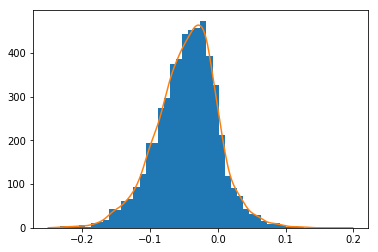

In [52]:
fitness = screen.results['fA'] + screen.results['fB'] + screen.results['pi_mean']
f = gaussian_kde(fitness)

counts, edges, _ = plt.hist(fitness, bins=40)
auc = np.sum(np.multiply(counts, [edges[ind + 1] - i for ind, i in enumerate(edges[:-1])]))

x = np.arange(-0.25, 0.2, 0.001)
y = f(x)*auc

plt.plot(x,y)

(array([   4.,    1.,    3.,    8.,   10.,   10.,   28.,   33.,   77.,
          92.,   99.,  122.,  220.,  268.,  337.,  455.,  472.,  616.,
         735.,  759.,  814.,  909.,  826.,  809.,  721.,  485.,  334.,
         235.,  174.,  112.,   69.,   45.,   35.,   33.,   17.,   11.,
           9.,    2.,    9.,    2.]),
 array([-0.237   , -0.227675, -0.21835 , -0.209025, -0.1997  , -0.190375,
        -0.18105 , -0.171725, -0.1624  , -0.153075, -0.14375 , -0.134425,
        -0.1251  , -0.115775, -0.10645 , -0.097125, -0.0878  , -0.078475,
        -0.06915 , -0.059825, -0.0505  , -0.041175, -0.03185 , -0.022525,
        -0.0132  , -0.003875,  0.00545 ,  0.014775,  0.0241  ,  0.033425,
         0.04275 ,  0.052075,  0.0614  ,  0.070725,  0.08005 ,  0.089375,
         0.0987  ,  0.108025,  0.11735 ,  0.126675,  0.136   ]),
 <a list of 40 Patch objects>)

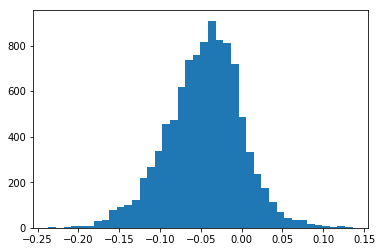

In [80]:
ps = f.pdf(x)/np.sum(f.pdf(x))
n = []
for _ in range(0, 10000): 
    n.append(np.random.choice(x, p=ps))
    
plt.hist(n, bins=40)

In [86]:
counts_full_df = pd.read_csv(counts_file, sep='\t')

In [91]:
counts_full_df.iloc[:, 5:].sum()

testing_T3_1      8283976.0
testing_T3_2     10689912.0
testing_T14_1     7654911.0
testing_T14_2     8665073.0
testing_T21_1     8381603.0
testing_T21_2     8464567.0
testing_T28_1    13267165.0
testing_T28_2    15837516.0
dtype: float64

In [94]:
fitness.head()

0   -0.027891
1    0.006316
2   -0.020637
3   -0.032892
4   -0.078481
dtype: float64

In [96]:
print(515*np.power(2, 11*-0.020637))
print(515*np.power(2, 18*-0.020637))
print(515*np.power(2, 25*-0.020637))

440.018881568
398.093256276
360.162364233


In [ ]:
515*np.power(2, 11*-0.020637)

# Changing the relative counts of A549

In [108]:
#abundance_file = "/cellar/users/bpmunson/crappy/data/test_data/input_data/A549/A549_abundance_thresholds.txt"
#counts_file = "/cellar/users/bpmunson/crappy/data/test_data/input_data/A549/A549_timepoint_counts.txt"

abundance_file = os.path.join(A549, 'A549_abundance_thresholds.txt')
counts_file = os.path.join(A549, 'A549_timepoint_counts.txt')

times = np.array([3,14,21,28])

# initialize screen object
#screen = dual_crispr_screen.Screen(counts_file, times)
screen = dual_crispr_screen.Screen(counts_full_df, times)

# set some parameters
# number of iterations to perform
screen.options.niter = 2
screen.options.null_target_id = '0'
screen.options.verbose = True

# perform construct fitness calculation
screen.run_construct_fitting()

# run bootstraps
screen.run_bootstrap()

# summarize results 
screen.summarize()

# view results 
screen.results.head()

original = screen.results.copy()

/cellar/users/samsonfong/crappy/src/fit_ac_fc.py:261: RuntimeWarning: invalid value encountered in true_divide
  ac = mean_counts - (fc*mean_time)
/cellar/users/samsonfong/crappy/src/fit_ac_fc.py:287: RuntimeWarning: invalid value encountered in true_divide
  has_sd = df > 0


Iter	RMS	Relative Error
1	0.0214	0.028289
2	0.0213	0.017793
3	0.0213	0.013815
4	0.0214	0.012364
5	0.0215	0.010769
6	0.0215	0.008601
7	0.0215	0.006647
8	0.0215	0.005417
9	0.0215	0.004660
10	0.0214	0.004051
11	0.0214	0.003472
12	0.0214	0.002905
13	0.0214	0.002373
14	0.0213	0.001897
15	0.0213	0.001491
16	0.0213	0.001156
17	0.0213	0.000887
Performing iteration: 1
Iter	RMS	Relative Error
1	0.0156	0.060639
2	0.0139	0.034184
3	0.0129	0.020224
4	0.0124	0.011574
5	0.0121	0.006352
6	0.0119	0.003434
7	0.0119	0.001871
8	0.0118	0.001050
9	0.0118	0.000624
Performing iteration: 2
Iter	RMS	Relative Error
1	0.0155	0.060566
2	0.0137	0.033121
3	0.0126	0.019194
4	0.0120	0.011322
5	0.0117	0.006953
6	0.0115	0.004572
7	0.0113	0.003189
8	0.0113	0.002301
9	0.0112	0.001684
10	0.0112	0.001237
11	0.0112	0.000909


/cellar/users/samsonfong/crappy/src/bootstrap_pi.py:274: RuntimeWarning: divide by zero encountered in true_divide
  fdr_right = np.minimum(1, enull(-pi_mean)/(1-emean(pi_mean)))


In [119]:
#abundance_file = "/cellar/users/bpmunson/crappy/data/test_data/input_data/A549/A549_abundance_thresholds.txt"
#counts_file = "/cellar/users/bpmunson/crappy/data/test_data/input_data/A549/A549_timepoint_counts.txt"

abundance_file = os.path.join(A549, 'A549_abundance_thresholds.txt')
counts_file = os.path.join(A549, 'A549_timepoint_counts.txt')

times = np.array([3,14,21,28])

# initialize screen object
screen = dual_crispr_screen.Screen(counts_file, times, abundance_file)
#screen = dual_crispr_screen.Screen(counts_full_df, times)

# set some parameters
# number of iterations to perform
screen.options.niter = 10
screen.options.null_target_id = '0'
screen.options.verbose = False

# perform construct fitness calculation
screen.run_construct_fitting()

# run bootstraps
screen.run_bootstrap()

# summarize results 
screen.summarize()

# view results 
screen.results.head()

/cellar/users/samsonfong/crappy/src/fit_ac_fc.py:261: RuntimeWarning: invalid value encountered in true_divide
  ac = mean_counts - (fc*mean_time)
/cellar/users/samsonfong/crappy/src/fit_ac_fc.py:287: RuntimeWarning: invalid value encountered in true_divide
  has_sd = df > 0
/cellar/users/samsonfong/crappy/src/bootstrap_pi.py:274: RuntimeWarning: divide by zero encountered in true_divide
  fdr_right = np.minimum(1, enull(-pi_mean)/(1-emean(pi_mean)))


,geneA,geneB,pi_mean,fdr_left,fdr_right,sd,z,pp,fA,fB
0,0,ABL1,-0.011929,0.596382,1.0,0.026113,-0.374269,0.3,-0.000109,-0.005471
1,0,ADA,0.031571,0.912282,1.0,0.018132,0.990555,0.9,-0.000109,-0.009981
2,0,AKT1,0.003905,0.759082,1.0,0.031183,0.122531,0.2,-0.000109,-0.018429
3,0,ALK,-0.035100,0.412829,1.0,0.016130,-1.101282,1.0,-0.000109,-0.008896
4,0,APC,0.000162,0.724293,1.0,0.026431,0.005078,0.0,-0.000109,-0.002714


In [120]:
np.corrcoef(np.vstack([original['pi_mean'].values, screen.results['pi_mean'].values]))

array([[ 1.        ,  0.64234484],
       [ 0.64234484,  1.        ]])

## Changing counts

In [123]:
import math

In [144]:
def _create_mask(n, total): 
    mask = [True]*n + [False]*(total - n)
    np.random.shuffle(mask)
    
    return mask

def changing_counts(df, frac, fitness, times): 
    m, n = df.shape
    n_rows = math.floor(m*frac)
    mask = _create_mask(n_rows, m)
        
    random_starts = np.random.choice(df.iloc[:, 0], size=n_rows)
    t = np.asarray(np.diff(times))
    
    np.power(2, )
    

In [238]:
def annotate_construct_fitness(constructs, fitness_df): 
    constructs = constructs.replace(to_replace=r'NonTargeting', value=0, regex=True)
    
    f = []
    for i, row in constructs.iterrows(): 
        f.append(fitness_df.loc[str(row['target_a_id']), str(row['target_b_id'])]['fitness'])
        
    return f

In [239]:
annotate_construct_fitness(counts_full_df[['target_a_id', 'target_b_id']], fitness_df)

KeyError: 'the label [0] is not in the [columns]'

In [246]:
screen.results.loc[(screen.results['geneA'] == '0') & (screen.results['geneB'] == '0')]

,geneA,geneB,pi_mean,fdr_left,fdr_right,sd,z,pp,fA,fB


In [231]:
counts_full_df.iloc[12154]

construct_id     NonTargetingControlGuideForHuman0433__NonTarge...
probe_a_id                    NonTargetingControlGuideForHuman0079
probe_b_id                    NonTargetingControlGuideForHuman0433
target_a_id                   NonTargetingControlGuideForHuman0079
target_b_id                   NonTargetingControlGuideForHuman0433
testing_T3_1                                                   153
testing_T3_2                                                   522
testing_T14_1                                                  280
testing_T14_2                                                  343
testing_T21_1                                                  200
testing_T21_2                                                  233
testing_T28_1                                                  282
testing_T28_2                                                  785
Name: 12154, dtype: object

In [209]:
fitness_df.index = pd.MultiIndex.from_tuples(list(zip(fitness_df['geneA'].values, fitness_df['geneB'].values)), names=['geneA', 'geneB'])

In [216]:
fitness_df.loc['ABL1', 'ADA']

geneA           ABL1
geneB            ADA
fitness   -0.0547196
Name: (ABL1, ADA), dtype: object

In [217]:
fitness_df.loc['ADA', 'ABL1']

geneA            ADA
geneB           ABL1
fitness   -0.0547196
Name: (ADA, ABL1), dtype: object

In [213]:
fitness_df

geneA    geneB   fitness
geneA geneB                           
0     ABL1        0     ABL1 -0.017508
      ADA         0      ADA  0.021481
      AKT1        0     AKT1 -0.014632
      ALK         0      ALK -0.044104
      APC         0      APC -0.002660
      ARID1A      0   ARID1A  0.012490
      ARID2       0    ARID2  0.000452
      ATM         0      ATM -0.042151
      BCL2        0     BCL2 -0.019464
      BRAF        0     BRAF -0.011515
      BRCA1       0    BRCA1 -0.046477
      BRCA2       0    BRCA2 -0.014862
      BRD4        0     BRD4 -0.045070
      BTK         0      BTK -0.002244
      CASP8       0    CASP8  0.004341
      CDH1        0     CDH1  0.012311
      CDK4        0     CDK4 -0.044647
      CDK6        0     CDK6 -0.030331
      CDK9        0     CDK9 -0.019546
      CDKN1B      0   CDKN1B -0.019528
      CDKN2A      0   CDKN2A -0.033456
      CHEK1       0    CHEK1 -0.140856
      CHEK2       0    CHEK2 -0.003625
      DHFR        0     DHFR -0.040712
      EGFR        0     EGFR -0.025985
      ERBB2       0    ERBB2 -0.049189
      FGFR2       0    FGFR2 -0.025981
      FGFR3       0    FGFR3 -0.013811
      FLT3        0     FLT3 -0.016744
      FNTA        0     FNTA -0.055954
...             ...      ...       ...
WEE1  MAP3K1   WEE1   MAP3K1 -0.063887
      MET      WEE1      MET -0.041869
      MLH1     WEE1     MLH1 -0.022520
      MSH6     WEE1     MSH6 -0.057807
      MTOR     WEE1     MTOR -0.086984
      NF1      WEE1      NF1 -0.020869
      PARP1    WEE1    PARP1 -0.082648
      PBRM1    WEE1    PBRM1 -0.057682
      PDGFRA   WEE1   PDGFRA -0.067742
      PIK3CA   WEE1   PIK3CA -0.073765
      PIK3R1   WEE1   PIK3R1 -0.049143
      PRKDC    WEE1    PRKDC -0.050042
      PTEN     WEE1     PTEN -0.024720
      RB1      WEE1      RB1 -0.024005
      ROR1     WEE1     ROR1 -0.100953
      RPS6KB1  WEE1  RPS6KB1 -0.127446
      RRM2     WEE1     RRM2 -0.081374
      RUNX1    WEE1    RUNX1 -0.022944
      SETD2    WEE1    SETD2 -0.018217
      SMAD4    WEE1    SMAD4 -0.016064
      SMARCA4  WEE1  SMARCA4 -0.069283
      SMARCB1  WEE1  SMARCB1 -0.040609
      SMO      WEE1      SMO -0.107346
      SRC      WEE1      SRC -0.037150
      TOP1     WEE1     TOP1 -0.114661
      TP53     WEE1     TP53  0.062530
      TSC1     WEE1     TSC1  0.003905
      TYMS     WEE1     TYMS -0.035722
      VEGFA    WEE1    VEGFA  0.001120
      VHL      WEE1      VHL -0.137336

[5402 rows x 3 columns]

In [145]:
changing_counts(counts_full_df.iloc[:, 5:], 0.05, fitness, [3, 14, 21, 28])

[11  7  7]


In [139]:
np.random.choice(counts_full_df.iloc[:, 5], size=10)

array([  185.,   732.,   183.,   144.,   453.,   147.,   163.,   407.,
         185.,  1020.])

In [147]:
t = np.array([[11, 7, 7]])

In [156]:
(fitness.values[np.newaxis].T * t).shape

(5402, 3)

In [158]:
counts_full_df[['target_a_id', 'target_b_id']]

,target_a_id,target_b_id
0,BRCA1,NonTargetingControlGuideForHuman0412
1,NonTargetingControlGuideForHuman0352,SETD2
2,BRCA1,NonTargetingControlGuideForHuman0362
3,BRCA2,NonTargetingControlGuideForHuman0352
4,NonTargetingControlGuideForHuman0362,RB1
5,FLT3,NonTargetingControlGuideForHuman0412
6,BRCA1,NonTargetingControlGuideForHuman0352
7,CDKN2A,NonTargetingControlGuideForHuman0362
8,HDAC1,NonTargetingControlGuideForHuman0412
9,NonTargetingControlGuideForHuman0362,SMO
